# **Import Libary**
Pada tahap ini, dilakukan proses import library yang diperlukan untuk mendukung pengolahan data, visualisasi, dan implementasi machine learning. Penjelasan masing-masing library adalah sebagai berikut:
- `pandas` : Digunakan untuk membaca, mengelola, dan menganalisis data dalam bentuk tabel (DataFrame)
- `numpy` : Digunakan untuk perhitungan numerik seperti array multidimensi dan fungsi matematika tingkat lanjut
- `matplotlib.pyplot` : Untuk membuat visualisasi data seperti grafik garis, scatter plot, dan histogram.
- `seaborn` : Library untuk visualisasi data berbasis Matplotlib dengan tampilan lebih menarik dan informatif.
- `tensorflow`: Framework open-source dari Google yang digunakan untuk membangun dan melatih model deep learning. Dalam proyek ini, digunakan untuk membangun model arsitektur **LSTM (Long Short-Term Memory)**.
- `tensorflow.keras.models.Sequential`:Digunakan untuk mendefinisikan model neural network secara berurutan (*linear stack*), yaitu lapisan demi lapisan disusun secara sekuensial.
- `tensorflow.keras.layers`

    - **LSTM**: Layer khusus untuk menangani data berurutan (sequence), seperti data time-series.

    - **Dropout**: Digunakan untuk mencegah overfitting dengan menghilangkan beberapa node secara acak selama pelatihan.

    - **RepeatVector**, **TimeDistributed**: Digunakan pada model **LSTM autoencoder** untuk membentuk kembali urutan data.

    - **Dense**: Layer fully connected untuk menghasilkan output akhir dari model.
- `tensorflow.keras.optimizers.Adam`: Optimizer adaptif yang sering digunakan karena efisiensinya dalam mempercepat proses konvergensi model deep learning.

- `tensorflow.keras.callbacks.EarlyStopping`: Teknik untuk menghentikan pelatihan model secara otomatis ketika performa validasi tidak menunjukkan peningkatan, sehingga menghindari overfitting.
- `tensorflow.keras.regularizers.l2`:Regularisasi L2 digunakan untuk menambahkan penalti pada bobot jaringan dalam upaya mengurangi overfitting.
- `sklearn.model_selection.train_test_split`: Membagi dataset menjadi dua subset utama, yaitu data latih dan data uji, guna melakukan evaluasi performa model secara adil.
- `sklearn.preprocessing.MinMaxScaler`
Digunakan untuk melakukan normalisasi fitur data dalam rentang 0 sampai 1. Ini penting agar model dapat belajar secara efektif.
- `sklearn.linear_model` : Mengimpor algoritma Linear Regression dari Scikit-Learn untuk membuat model prediksi.
- `sklearn.metrics` : Menghitung metrik evaluasi untuk mengukur kinerja model.
- `warnings`: Library bawaan Python yang digunakan untuk menangani peringatan (warnings).
-`sklearn.exceptions.ConvergenceWarning`: Menangkap jenis peringatan tertentu yang muncul saat model belum mencapai konvergensi optimal.
<br>
<br>
Baris terakhir, warnings.filterwarnings, digunakan untuk menonaktifkan peringatan yang berhubungan dengan "UserWarning" untuk memastikan eksekusi program berjalan lebih bersih tanpa gangguan dari pesan peringatan yang tidak relevan.

In [87]:
# 1. Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, RepeatVector, TimeDistributed, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=UserWarning)

# **Load Dataset**
Pada tahap ini, dilakukan proses **pembacaan data** dari file csv yang diambil dari dataset open source [Kaggle](https://www.kaggle.com/datasets/prasad22/daily-transactions-dataset/data). Data tersebut dibaca menggunakan fungsi` pd.read_csv` dari library `pandas`, yang mengubah data tersebut dari format csv menjadi Dataframe.Dan data ini akan menjadi sumber utama untuk proses analisis dan model selanjutnya dalam prediksi keuangan.


In [88]:
data = pd.read_csv("https://raw.githubusercontent.com/daniel020901/Proyek-pertama-Prediksi-pengeluaran-/master/Daily%20Household%20Transactions.csv")


Dilakukan proses eksplorasi struktur data menggunakan metode data.info() dari library pandas. Hasilnya memberikan informasi berikut:

- Tipe data: Dataset merupakan objek DataFrame dengan 2.461 baris (entries) dan 8 kolom

### Struktur data
| **No** | **Kolom**          | **Non-Null Count** | **Tipe Data** | **Deskripsi** |
|--------|------------------|-------------------|--------------|--------------|
| 0 | `Date` | 2461 non-null | `object` | Tanggal transaksi dalam format string. Perlu dikonversi ke `datetime`. |
| 1 | `Mode` | 2461 non-null | `object` | Metode pembayaran seperti "Cash", "Credit Card", "E-Wallet", dll. |
| 2 | `Category` | 2461 non-null | `object` | Kategori pengeluaran atau pemasukan, misalnya "Makanan", "Transportasi", dll. |
| 3 | `Subcategory` | 1826 non-null | `object` | Subkategori yang lebih spesifik dari transaksi, seperti "Groceries" dalam kategori "Food". Ada data kosong yang perlu ditangani. |
| 4 | `Note` | 1940 non-null | `object` | Catatan tambahan atau deskripsi singkat dari transaksi. Fitur ini bersifat tekstual dan tidak selalu diisi. |
| 5 | `Amount` | 2461 non-null | `float64` | Jumlah uang transaksi. Ini akan menjadi target variabel untuk prediksi. |
| 6 | `Income/Expense` | 2461 non-null | `object` | Jenis transaksi, apakah pemasukan (`Income`) atau pengeluaran (`Expense`). |
| 7 | `Currency` | 2461 non-null | `object` | Mata uang yang digunakan dalam transaksi. |



In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2461 entries, 0 to 2460
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            2461 non-null   object 
 1   Mode            2461 non-null   object 
 2   Category        2461 non-null   object 
 3   Subcategory     1826 non-null   object 
 4   Note            1940 non-null   object 
 5   Amount          2461 non-null   float64
 6   Income/Expense  2461 non-null   object 
 7   Currency        2461 non-null   object 
dtypes: float64(1), object(7)
memory usage: 153.9+ KB


Dilakukan proses menampilkan data awal menggunakan metode data.head() dari library pandas. Metode ini digunakan untuk melihat lima baris pertama dari dataset secara default. Tujuannya adalah:

- Memahami struktur dataset: Melihat format data dalam setiap kolom, seperti nama kolom, tipe data, dan contoh nilai.
- Memverifikasi data: Memastikan bahwa data telah berhasil diimpor dengan benar tanpa adanya error atau anomali.
- Identifikasi awal: Mengamati pola atau ciri khas dari data yang tersedia untuk menentukan langkah pra-pemrosesan selanjutnya.<br><br>
Hasil ini memberikan gambaran umum tentang dataset sebelum dilakukan kegiatan transformasi dataset agar dapat lebih mudah digunakan untuk analisa berikutnya.

In [90]:
data.head()

,Date,Mode,Category,Subcategory,Note,Amount,Income/Expense,Currency
0,20/09/2018 12:04:08,Cash,Transportation,Train,2 Place 5 to Place 0,30.0,Expense,INR
1,20/09/2018 12:03:15,Cash,Food,snacks,Idli medu Vada mix 2 plates,60.0,Expense,INR
2,19/09/2018,Saving Bank account 1,subscription,Netflix,1 month subscription,199.0,Expense,INR
3,17/09/2018 23:41:17,Saving Bank account 1,subscription,Mobile Service Provider,Data booster pack,19.0,Expense,INR
4,16/09/2018 17:15:08,Cash,Festivals,Ganesh Pujan,Ganesh idol,251.0,Expense,INR


# **Transform Data**
Pada tahap ini, dilakukan proses pra-pemrosesan data untuk mempersiapkan dataset agar lebih terstruktur dan siap digunakan dalam analisis lebih lanjut. Langkah-langkah yang dilakukan adalah sebagai berikut:



Sebelum memasuki tahapan Transform Data dilakukan tahapan `.copy()` untuk mensalin data asli kedalam `df` untuk menjaga keaslian data.


In [91]:
df = data.copy()

## **1. Menghapus Spasi Tambahan pada Nama Kolom**
- Dilakukan dengan metode `data.columns = data.columns.str.strip()` untuk memastikan nama kolom bersih dari karakter spasi yang mungkin memengaruhi proses manipulasi data.
 **2. Mengubah tipe data**

- `Mode`: Menyimpan metode pembayaran (misalnya "Cash", "Credit Card", "E-Wallet"). Karena hanya ada beberapa pilihan tetap, lebih baik dikonversi ke kategori.
- `Category`: Menyimpan kategori transaksi (misalnya "Makanan", "Transportasi"), yang jumlah opsinya terbatas.
- `Subcategory`: Subkategori dari Category (misalnya "Fast Food", "Taksi"), yang juga lebih baik dalam format kategori.
- `Income/Expense`: Menyimpan jenis transaksi ("Income" atau "Expense"), hanya memiliki dua nilai unik sehingga sangat ideal untuk kategori.
- `Currency`: Menyimpan mata uang yang digunakan (misalnya "IDR", "USD"), jumlah opsinya terbatas sehingga lebih efisien dalam kategori.

In [92]:
df.columns = df.columns.str.strip()



## **2. Mengubah tipe data**

- `Mode`: Menyimpan metode pembayaran (misalnya "Cash", "Credit Card", "E-Wallet"). Karena hanya ada beberapa pilihan tetap, lebih baik dikonversi ke kategori.
- `Category`: Menyimpan kategori transaksi (misalnya "Makanan", "Transportasi"), yang jumlah opsinya terbatas.
- `Subcategory`: Subkategori dari Category (misalnya "Fast Food", "Taksi"), yang juga lebih baik dalam format kategori.
- `Income/Expense`: Menyimpan jenis transaksi ("Income" atau "Expense"), hanya memiliki dua nilai unik sehingga sangat ideal untuk kategori.
- `Currency`: Menyimpan mata uang yang digunakan (misalnya "IDR", "USD"), jumlah opsinya terbatas sehingga lebih efisien dalam kategori.

In [93]:
# Ubah tipe data


df['Mode'] = df['Mode'].astype('category')  # Ubah ke kategori
df['Category'] = df['Category'].astype('category')  # Ubah ke kategori
df['Subcategory'] = df['Subcategory'].astype('category')  # Ubah ke kategori
df['Income/Expense'] = df['Income/Expense'].astype('category')  # Ubah ke kategori
df['Currency'] = df['Currency'].astype('category')  # Ubah ke category


## **3. Membersihkan Format Tanggal**
Pada tahap ini, dilakukan proses pembersihan data pada kolom `Date` untuk memastikan format tanggal lebih konsisten dan siap digunakan dalam analisis.

### **Langkah-langkah yang dilakukan**:
- Menghapus bagian jam, menit, dan detik (jika ada) dari kolom `Date`.
- Menggunakan **regex** (regular expression) untuk mendeteksi pola waktu (`hh:mm` atau `hh:mm:ss`).

### **Penjelasan Ekspresi Reguler (Regex)**
Ekspresi reguler yang digunakan:  
```python
r'\s\d{2}:\d{2}(:\d{2})?'

```
- `\s `→ Mendeteksi spasi sebelum waktu.
- `\d{2}:\d{2}` → Mendeteksi format jam dan menit (hh:mm).
- `(:\d{2})?` → Bagian detik (:ss) bersifat opsional (bisa ada atau tidak).
regex=True → Menandakan bahwa ini adalah ekspresi reguler yang digunakan dalam str.replace().

In [94]:
df['Date'] = df['Date'].str.replace(r'\s\d{2}:\d{2}(:\d{2})?', '', regex=True)

# Mengubah kolom 'Date' menjadi datetime
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')


Dilakukan proses menampilkan data awal dari DataFrame hasil transformasi (`df`) menggunakan metode `head()`. Metode ini bertujuan untuk menampilkan lima baris pertama dari dataset yang telah diproses. Hasil yang diperoleh memberikan gambaran struktur dataset setelah transformasi:

- **Kolom Date**: Berisi tanggal transaksi dalam format string yang nantinya akan dikonversi ke format `datetime`.
- **Kolom Mode**: Berisi metode pembayaran yang digunakan, seperti "Cash" atau "Saving Bank Account".
- **Kolom Category**: Menunjukkan jenis kategori transaksi, seperti "Transportation", "Food", atau "Festivals".
- **Kolom Subcategory**: Subkategori dari kategori utama, seperti "Train" untuk kategori "Transportation".
- **Kolom Note**: Berisi catatan tambahan tentang transaksi.
- **Kolom Amount**: Berisi jumlah transaksi dalam format numerik (`float`).
- **Kolom Income/Expense**: Menunjukkan apakah transaksi tersebut adalah **pemasukan** (`Income`) atau **pengeluaran** (`Expense`).
- **Kolom Currency**: Menunjukkan mata uang yang digunakan dalam transaksi.

Langkah ini memastikan bahwa dataset sudah memiliki struktur yang sesuai dengan kebutuhan analisis lebih lanjut.




In [95]:
df.head()

,Date,Mode,Category,Subcategory,Note,Amount,Income/Expense,Currency
0,2018-09-20,Cash,Transportation,Train,2 Place 5 to Place 0,30.0,Expense,INR
1,2018-09-20,Cash,Food,snacks,Idli medu Vada mix 2 plates,60.0,Expense,INR
2,2018-09-19,Saving Bank account 1,subscription,Netflix,1 month subscription,199.0,Expense,INR
3,2018-09-17,Saving Bank account 1,subscription,Mobile Service Provider,Data booster pack,19.0,Expense,INR
4,2018-09-16,Cash,Festivals,Ganesh Pujan,Ganesh idol,251.0,Expense,INR


# **Info Data**

## **Eksplorasi Struktur Dataset Hasil Transformasi**
Dilakukan proses eksplorasi struktur dataset hasil transformasi menggunakan metode `df.info()`. Informasi yang diperoleh mencakup:

- **Tipe Data**: Dataset berupa objek `DataFrame` dengan jumlah total **2.461 baris** dan **8 kolom**.
- **Nama Kolom**:
  - **Date** (`datetime64[ns]`): Berisi tanggal transaksi yang telah dikonversi ke format `datetime`.
  - **Mode** (`category`): Metode pembayaran yang digunakan, seperti "Cash" atau "Saving Bank Account".
  - **Category** (`category`): Kategori utama transaksi, seperti "Transportation" atau "Food".
  - **Subcategory** (`category`): Subkategori dari kategori utama, namun memiliki beberapa nilai yang **kosong (1826 non-null)**.
  - **Note** (`object`): Catatan tambahan terkait transaksi, dengan beberapa nilai **kosong (1940 non-null)**.
  - **Amount** (`float64`): Jumlah transaksi dalam format numerik (`float`).
  - **Income/Expense** (`category`): Menunjukkan apakah transaksi tersebut adalah **pemasukan** (`Income`) atau **pengeluaran** (`Expense`).
  - **Currency** (`category`): Mata uang yang digunakan dalam transaksi.

- **Jumlah Baris**: **2.461** baris mencerminkan jumlah total transaksi yang telah diproses.
- **Penggunaan Memori**: **75.7 KB**, dengan optimasi tipe data pada kolom kategori untuk mengurangi pemakaian memori.

Langkah ini memastikan bahwa dataset hasil transformasi memiliki tipe data dan struktur yang sesuai untuk **analisis lebih lanjut**.


In [96]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2461 entries, 0 to 2460
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            2461 non-null   datetime64[ns]
 1   Mode            2461 non-null   category      
 2   Category        2461 non-null   category      
 3   Subcategory     1826 non-null   category      
 4   Note            1940 non-null   object        
 5   Amount          2461 non-null   float64       
 6   Income/Expense  2461 non-null   category      
 7   Currency        2461 non-null   category      
dtypes: category(5), datetime64[ns](1), float64(1), object(1)
memory usage: 75.7+ KB


## **Analisis Statistik Deskriptif Dataset**
Dilakukan proses analisis statistik deskriptif menggunakan metode `df.describe()`. Metode ini memberikan ringkasan statistik untuk kolom numerik dalam dataset, yaitu:

- **Count**: Jumlah data non-null dalam setiap kolom numerik.
  - **Date**: 2.461 data non-null.
  - **Amount**: 2.461 data non-null.

- **Mean (Rata-rata)**:
  - **Date**: 3 April 2017 (2017-04-03 17:00:27).
  - **Amount**: 2.751,15 (rata-rata nilai transaksi).

- **Minimum (Min)**:
  - **Date**: 1 Januari 2015 (2015-01-01).
  - **Amount**: 2,00 (nilai transaksi terkecil).

- **Persentil**:
  - **25% (Kuartil 1)**:
    - **Date**: 22 Oktober 2016.
    - **Amount**: 35,00.
  - **50% (Median/Kuartil 2)**:
    - **Date**: 25 Juni 2017.
    - **Amount**: 100,00.
  - **75% (Kuartil 3)**:
    - **Date**: 15 Januari 2018.
    - **Amount**: 799,00.

- **Maximum (Max)**:
  - **Date**: 20 September 2018 (2018-09-20).
  - **Amount**: 250.000,00 (nilai transaksi terbesar).

- **Standard Deviation (std)**:
  - **Date**: Tidak tersedia (`NaN`).
  - **Amount**: 12.519,62 (variabilitas transaksi cukup tinggi).

Hasil ini memberikan gambaran umum distribusi data numerik dalam dataset, termasuk pola transaksi berdasarkan waktu serta rentang dan variasi nilai transaksi.


In [97]:
df.describe()

,Date,Amount
count,2461,2461.000000
mean,2017-04-03 17:00:27.793579776,2751.145380
min,2015-01-01 00:00:00,2.000000
25%,2016-10-22 00:00:00,35.000000
50%,2017-06-25 00:00:00,100.000000
75%,2018-01-15 00:00:00,799.000000
max,2018-09-20 00:00:00,250000.000000
std,NaN,12519.615804


# **Cleansing Data**

  Dilakukan proses pembersihan data untuk memastikan kolom Amount memiliki nilai valid dan dapat dianalisis. Langkah-langkah yang dilakukan adalah sebagai berikut:



**1.   Membersihkan kolom Amount**:


  -   Koma (,) dan spasi ( ) dalam nilai harga dihapus menggunakan replace() dengan parameter regex=True.
  -   Nilai dalam kolom harga dikonversi menjadi tipe numerik menggunakan pd.to_numeric(). Nilai yang tidak valid secara otomatis diubah menjadi NaN dengan parameter errors='coerce'.


**2.   Mengisi values yang hilang pada kolom sub-category**:

  - Memberikan keterangan jika nilai kosong dengan tidak diketahui







In [98]:
df['Amount'] = data['Amount'].replace({',': '', ' ': ''}, regex=True)
df['Amount'] = pd.to_numeric(data['Amount'], errors='coerce')

## **Menangani Nilai Hilang pada Kolom 'Subcategory'**
Dalam dataset, terdapat nilai yang hilang pada kolom **Subcategory**. Untuk mengatasi hal ini, dilakukan langkah-langkah berikut:

- **Menambahkan Kategori Baru "Tidak Diketahui"**  
   Karena kolom **Subcategory** bertipe *category*, kategori baru **"Tidak Diketahui"** ditambahkan menggunakan metode `cat.add_categories()`.

   ```python
   df['Subcategory'] = df['Subcategory'].cat.add_categories('Tidak Diketahui')


In [99]:
# Menambahkan kategori baru 'Tidak Diketahui' ke dalam kolom 'Subcategory'
df['Subcategory'] = df['Subcategory'].cat.add_categories('Tidak Diketahui')

# Sekarang isi nilai yang hilang dengan 'Tidak Diketahui'
df['Subcategory'].fillna('Tidak Diketahui', inplace=True)

# Memeriksa hasilnya
print(df['Subcategory'].value_counts())


Subcategory
Tidak Diketahui    635
Milk               162
auto               142
snacks             115
Grocery            113
                  ... 
Leisure              1
Makeup               1
Updation             1
ropeway              1
makeup               1
Name: count, Length: 91, dtype: int64


<ipython-input-99-526075f88bef>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Subcategory'].fillna('Tidak Diketahui', inplace=True)




*   **Mengisi Nilai Hilang dengan Label Khusus**<br>
Setelah kategori tambahan berhasil dimasukkan, nilai hilang pada kolom Subcategory kemudian diisi dengan label **Tidak Diketahui**, sedangkan nilai hilang pada kolom Note diisi dengan label **Tanpa Keterangan**.
<br><br>
*   **Verifikasi Pengisian Nilai Hilang**<br>
Untuk memastikan bahwa semua nilai hilang telah berhasil diatasi, dilakukan pengecekan jumlah nilai kosong pada masing-masing kolom setelah proses imputasi.



In [100]:
# Mengisi nilai yang hilang di kolom 'Subcategory' dengan 'Tidak Diketahui'
df['Subcategory'].fillna('Tidak Diketahui', inplace=True)

# Mengisi nilai yang hilang di kolom 'Note' dengan 'Tanpa Keterangan'
df['Note'].fillna('Tanpa Keterangan', inplace=True)

# Mengecek setelah pengisian nilai yang hilang
print(df.isnull().sum())


Date              0
Mode              0
Category          0
Subcategory       0
Note              0
Amount            0
Income/Expense    0
Currency          0
dtype: int64


<ipython-input-100-4efcec691eff>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Subcategory'].fillna('Tidak Diketahui', inplace=True)
<ipython-input-100-4efcec691eff>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)

In [101]:
df.duplicated().sum()

np.int64(11)

In [102]:
df.drop_duplicates(inplace=True)


Setelah dilakukan pemeriksaan menggunakan fungsi `df.duplicated().sum()`, ditemukan sebanyak 11 baris duplikat dalam dataset. Baris-baris ini memiliki nilai yang sama persis dengan baris sebelumnya pada semua kolom. Duplikasi data seperti ini dapat menyebabkan bias dalam proses analisis, khususnya dalam model machine learning yang sensitif terhadap distribusi data. Oleh karena itu, langkah penghapusan baris duplikat perlu dilakukan untuk menjaga kualitas dan akurasi model yang dibangun.



## **Mengganti nilai 'Transfer-Out' menjadi 'Expense' pada kolom 'Income/Expense'**
Pada langkah ini, dilakukan proses transformasi data untuk memastikan konsistensi dalam kategori `Income/Expense`. Secara spesifik, nilai `Transfer-Out` pada kolom `Income/Expense` diganti dengan 'Expense'.



- **Alasan Transformasi**
  - **Menghindari ambiguitas**: secara konseptual serupa dengan pengeluaran (`Expense`).
  - **Memudahkan analisis**: Kategori yang lebih sederhana mempermudah pengelompokan dan visualisasi data.

In [103]:
# Mengganti nilai 'Transfer-Out' menjadi 'Expense' pada kolom 'Income/Expense'
df['Income/Expense'] = df['Income/Expense'].replace('Transfer-Out', 'Expense')

# Memeriksa hasil perubahan
print(df['Income/Expense'].value_counts())


Income/Expense
Expense    2325
Income      125
Name: count, dtype: int64


<ipython-input-103-c22db463799a>:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['Income/Expense'] = df['Income/Expense'].replace('Transfer-Out', 'Expense')


Dilakukan proses analisis statistik deskriptif pada dataset yang telah dibersihkan (data_transformed_clean) menggunakan metode describe(). Metode ini memberikan ringkasan statistik untuk kolom numerik yang tersisa dalam dataset, yang meliputi:

1. **Count**: Jumlah data non-null dalam setiap kolom numerik .
2. **Mean**: Nilai rata-rata dari kolom numerik, memberikan gambaran nilai tengah harga komoditas dan distribusi waktu.
3. **Standard Deviation (std)**: Mengukur seberapa besar variasi atau penyebaran data uang dan waktu dari nilai rata-rata.
4. **Minimum (min)**: Nilai terkecil yang terdapat dalam kolom numerik, menunjukkan nilai uang terendah yang tercatat dalam dataset.
5. **Percentile (25%, 50%, 75%)**: Mengindikasikan distribusi data pada kuartil pertama (25%), median (50%), dan kuartil ketiga (75%).
6. **Maximum (max)**: Nilai terbesar yang terdapat dalam kolom numerik, menunjukkan nilai uang tertinggi yang tercatat.

Hasil ini memberikan gambaran yang lebih jelas tentang pengeluaran dan pemasukan setelah pembersihan data, serta memberikan wawasan lebih lanjut terkait variasi dan prediksi yang dianalisis.

In [104]:
df.describe()

,Date,Amount
count,2450,2450.000000
mean,2017-04-03 10:15:58.040816384,2760.211747
min,2015-01-01 00:00:00,2.000000
25%,2016-10-15 12:00:00,35.000000
50%,2017-06-24 12:00:00,100.000000
75%,2018-01-16 00:00:00,785.500000
max,2018-09-20 00:00:00,250000.000000
std,NaN,12546.933575


Dilakukan proses **menampilkan data awal** dari dataset yang telah dibersihkan (`df`) menggunakan metode `head()`. Metode ini akan menampilkan lima baris pertama dari dataset yang sudah tidak mengandung nilai NaN atau 0 pada kolom harga. Hal ini bertujuan untuk:

* **Verifikasi pembersihan data**: Memastikan bahwa baris yang mengandung nilai tidak valid telah berhasil dihapus.
* **Menampilkan contoh data**: Memberikan gambaran awal mengenai struktur data yang telah dibersihkan, termasuk kolom `Date`, `Mode`,	`Category`,	`Subcategory`,	`Note`,	`Amount`,	`Income/Expense`,	`Currency`
* **Memastikan konsistensi data**: Memeriksa apakah dataset sekarang sudah terstruktur dengan benar, dengan nilai  yang valid dan kolom waktu yang sesuai.
<br>
Hasil ini memungkinkan untuk memverifikasi bahwa pembersihan data telah dilakukan dengan benar dan dataset siap untuk analisis lebih lanjut.

In [105]:
df.head()

,Date,Mode,Category,Subcategory,Note,Amount,Income/Expense,Currency
0,2018-09-20,Cash,Transportation,Train,2 Place 5 to Place 0,30.0,Expense,INR
1,2018-09-20,Cash,Food,snacks,Idli medu Vada mix 2 plates,60.0,Expense,INR
2,2018-09-19,Saving Bank account 1,subscription,Netflix,1 month subscription,199.0,Expense,INR
3,2018-09-17,Saving Bank account 1,subscription,Mobile Service Provider,Data booster pack,19.0,Expense,INR
4,2018-09-16,Cash,Festivals,Ganesh Pujan,Ganesh idol,251.0,Expense,INR


## **Penjelasan Variabel**


1.   **Date**
* **Tipe:** datetime64[ns]
* **Deskripsi:** Menyimpan tanggal dan waktu transaksi yang tercatat. Formatnya adalah YYYY-MM-DD HH:MM:SS (misalnya, 2018-09-20 12:04:08). Kolom ini digunakan untuk menunjukkan kapan transaksi terjadi, yang penting untuk analisis berbasis waktu seperti tren bulanan atau tahunan.
2.   **Mode**
* **Tipe:** category
* **Deskripsi:** Menyimpan cara pembayaran atau metode transaksi yang digunakan, misalnya Cash, Credit Card, Debit, atau Bank Transfer. Kolom ini membantu mengkategorikan transaksi berdasarkan metode pembayaran yang digunakan.
3. **Category**
* **Tipe:** category
* **Deskripsi:** Menyimpan kategori utama pengeluaran atau pendapatan, seperti Transportation, Food, Subscription, dan sebagainya. Kolom ini digunakan untuk mengelompokkan transaksi dalam kategori umum yang memudahkan analisis pengeluaran atau pemasukan.
4. **Subcategory**
* **Tipe:** category
* **Deskripsi:** Menyimpan subkategori lebih spesifik dari kategori utama. Misalnya, dalam kategori Food, subkategori bisa berupa snacks, groceries, atau dining. Kolom ini memberikan detail lebih lanjut tentang jenis transaksi di dalam kategori tersebut.
5. **Note**
* **Tipe:** object
* **Deskripsi:** Menyimpan deskripsi atau catatan tambahan terkait transaksi. Kolom ini biasanya berisi informasi lebih rinci atau keterangan mengenai transaksi, seperti "Idli medu Vada mix 2 plates" atau "Ganesh idol". Data ini sering kali digunakan untuk memberikan konteks lebih lanjut bagi transaksi yang tercatat.
6. **Amount**
* **Tipe:** float64
* **Deskripsi:** Menyimpan jumlah uang yang terkait dengan transaksi. Nilai dalam kolom ini menunjukkan besarnya pengeluaran atau pemasukan yang tercatat, dan biasanya berupa angka desimal (misalnya, 30.0, 199.0). Data ini penting untuk perhitungan total pengeluaran atau pemasukan.
7. **Income/Expense**
* **Tipe:** category
* **Deskripsi:** Menyimpan tipe transaksi apakah itu Income (pendapatan) atau Expense (pengeluaran). Kolom ini membantu dalam mengkategorikan transaksi sebagai pemasukan atau pengeluaran yang berguna untuk analisis keuangan.
8. **Currency**
* **Tipe:** category
* **Deskripsi:** Menyimpan mata uang yang digunakan dalam transaksi, seperti INR, IDR, atau EUR. Kolom ini membantu dalam menentukan mata uang yang digunakan dalam transaksi, yang penting ketika melakukan analisis lintas negara atau konversi mata uang.

# **Visualisasi Data**
## **Analisis Pergerakan Income dan Expense Per Bulan (2015–2018)**
Langkah ini memvisualisasikan pergerakan jumlah Income dan Expense per bulan dari tahun 2015 hingga 2018. Proses yang dilakukan:

1. **Filter data** : Data difilter berdasarkan rentang tanggal antara 1 Januari 2015 hingga 20 September 2018. Hal ini bertujuan untuk fokus pada periode yang konsisten dan relevan dengan kebutuhan analisis tren keuangan jangka menengah.
2. **Sub-column** :Untuk analisis bulanan, ditambahkan kolom `Year-Month` dengan format periode bulan (`YYYY-MM`). Ini memudahkan proses agregasi jumlah nominal transaksi berdasarkan bulan.
3. **Menghitung Total Bulanan Income dan Expense** : Data dikelompokkan berdasarkan bulan (`Year-Month`) dan kategori (`Income/Expense`). Kemudian, dihitung total jumlah (`Amount`) dari masing-masing kategori pada setiap bulan.


In [106]:
df['Date'].min(), df['Date'].max()
start_date = '2015-01-01'
end_date = '2018-09-20'
df_filtered = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]
# Menambahkan kolom 'Year-Month' untuk mengelompokkan data per bulan
df_filtered['Year-Month'] = df_filtered['Date'].dt.to_period('M')

# Group by Year-Month dan Income/Expense, kemudian sum Amount
df_grouped = df_filtered.groupby(['Year-Month', 'Income/Expense'])['Amount'].sum().unstack(fill_value=0)


<ipython-input-106-985f51a35a0d>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped = df_filtered.groupby(['Year-Month', 'Income/Expense'])['Amount'].sum().unstack(fill_value=0)


### **Visualisasi Tren Pergerakan Income dan Expense**
Grafik garis digunakan untuk menggambarkan fluktuasi jumlah pemasukan dan pengeluaran per bulan. Hal ini berguna untuk memahami siklus keuangan, pola pengeluaran bulanan

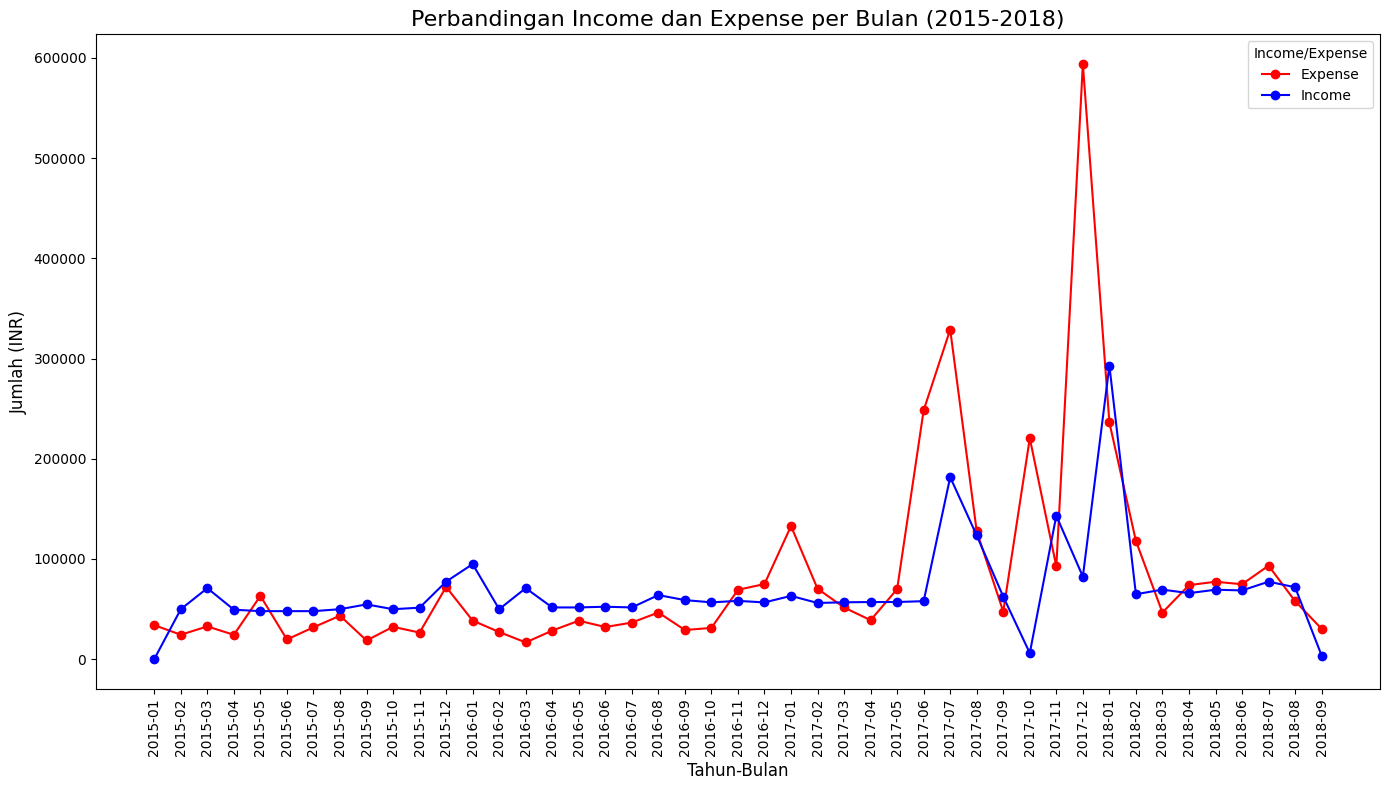

In [107]:
# Plot hasil perbandingan Income dan Expense dengan line chart
plt.figure(figsize=(14, 8))
plt.plot(df_grouped.index.astype(str), df_grouped['Expense'], label='Expense', color='red', marker='o')
plt.plot(df_grouped.index.astype(str), df_grouped['Income'], label='Income', color='blue', marker='o')

# Menambahkan judul dan label
plt.title('Perbandingan Income dan Expense per Bulan (2015-2018)', fontsize=16)
plt.xlabel('Tahun-Bulan', fontsize=12)
plt.ylabel('Jumlah (INR)', fontsize=12)

# Menambahkan legenda
plt.legend(title='Income/Expense')

# Mengatur tampilan agar tidak terpotong
plt.xticks(rotation=90)
plt.tight_layout()

# Menampilkan plot
plt.show()


# **Long Short Term Memory(LSTM)**



## **Prepocessing Data**
Pada tahap ini, data dipersiapkan untuk analisis  prediksi keuangan di masa depan berdasarkan historis. Langkah-langkah yang dilakukan sebagai berikut:


### **1. Pilih kolom yang relevan**:
  - Data yang akan difokuskan pada kolom berdasarkan `Date`,` Amount`, `Income/Expense` yang hanya bernilai `Expense`.

In [108]:
# Filter baris yang hanya memiliki nilai 'Expense' di kolom 'Income/Expense'
expense_df = df[df['Income/Expense'] == 'Expense']

# Memilih hanya kolom 'Date', 'Income/Expense', dan 'Amount'
expense_df = expense_df[['Date', 'Income/Expense', 'Amount']]

# Menampilkan hasil
print(expense_df.head())


        Date Income/Expense  Amount
0 2018-09-20        Expense    30.0
1 2018-09-20        Expense    60.0
2 2018-09-19        Expense   199.0
3 2018-09-17        Expense    19.0
4 2018-09-16        Expense   251.0


### 2.**Konversi mata uang**:
  - Mengkonversi mata uang `INR` ke dalam bentuk `IDR` untuk kebutuhan analisis.Konversi ini dilakukan secara manual

  1 INR = 191.96 IDR per tanggal 20-Mei-2025
  
  Langkah preprocessing ini memastikan data siap digunakan untuk metode peramalan berbasis deret waktu.

In [109]:
# Tentukan nilai tukar INR ke IDR
nilai_tukar = 191.96  # 1 INR = 187.60 IDR (per tanggal 20-05-2025)

# Mengonversi kolom 'Amount' dari INR ke IDR dan menggantinya di kolom yang sama
expense_df['Amount'] = expense_df['Amount'] * nilai_tukar




Pada tahap ini, data awal (lima baris pertama) dari subset `expense_df` ditampilkan untuk memeriksa struktur dan isi data. Subset ini berisi data `amount` dengan kolom sebagai berikut:

  - **Date**: Indeks waktu yang menunjukkan tanggal .
  - **Amount**: Nilai uang yang sudah dikonversi dalam bentuk IDR.
  
Menampilkan data awal membantu memastikan bahwa data telah terpisah dengan benar dan sesuai untuk langkah analisis selanjutnya.

In [110]:
print(expense_df.head())

        Date Income/Expense    Amount
0 2018-09-20        Expense   5758.80
1 2018-09-20        Expense  11517.60
2 2018-09-19        Expense  38200.04
3 2018-09-17        Expense   3647.24
4 2018-09-16        Expense  48181.96


## **Normalisasi Data**
Setelah data dipisahkan menjadi data latih dan data uji, langkah selanjutnya adalah melakukan normalisasi data. Proses ini bertujuan untuk menyetarakan skala nilai pada kolom `Amount` agar model prediksi dapat bekerja lebih optimal dan stabil, terutama jika menggunakan algoritma yang sensitif terhadap perbedaan skala data seperti `LSTM` atau model berbasis jaringan saraf.
<br>

**Fitur yang Dinormalisasi:**
* Kolom `Amount`, yang berisi nominal pengeluaran dalam satuan Rupiah (setelah dikonversi dari `INR`), dijadikan target untuk dinormalisasi.

* Normalisasi dilakukan agar nilai `Amount` berada dalam rentang 0 hingga 1, menggunakan metode` Min-Max Scaling`.
<br>

**Proses Normalisasi:**
* Fungsi `MinMaxScaler` dari library `scikit-learn` digunakan untuk melakukan normalisasi dengan skala minimum 0 dan maksimum 1.

* Model *scaler* hanya dilatih (`fit_transform`) menggunakan data latih untuk mencegah kebocoran data (*data leakage*).

* Setelah itu, transformasi (*transform*) dilakukan pada kolom `Amount`.

Langkah ini sangat penting dalam pemodelan machine learning atau deep learning karena membantu mempercepat proses pelatihan, menghindari dominasi fitur dengan skala besar, dan menjaga stabilitas komputasi.

In [111]:
# Normalisasi kolom 'Amount' menggunakan MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
expense_df['Amount'] = scaler.fit_transform(expense_df[['Amount']])

## **Pemisahan Data: Data Latih dan Data Uji**
Pada tahap ini, data transaksi pengeluaran dipisahkan menjadi dua bagian utama, yaitu data latih (*training data*) dan data uji (*testing data*). Pemisahan ini bertujuan untuk mendukung proses pelatihan dan evaluasi model prediksi anomali, agar model tidak hanya menghafal data yang ada, tetapi mampu mempelajari pola dan tren dari waktu ke waktu.

<br>

**Fitur dan Target**<br>

* Dalam konteks prediksi anomali, kolom `Amount` dijadikan sebagai target variabel yang ingin diramalkan di masa depan.

* Sementara kolom `Date` digunakan sebagai referensi waktu untuk keperluan pemodelan berbasis deret waktu (**time series**).

<br>

**Pemecahan Data**<br>
Dataset pengeluaran secara keseluruhan dibagi ke dalam dua bagian:

* **Data Latih**(*Training Data*): `train_data = amount_data[:split_index]`
Mengambil data dari awal sampai sebelum indeks ke-80%.
Ini akan digunakan sebagai data pelatihan untuk model.

* **Data Uji** (*Testing Data*): `test_data = amount_data[split_index:]`
Mengambil data dari indeks ke-80% hingga akhir array.
Ini akan digunakan sebagai data pengujian, untuk melihat seberapa baik model memprediksi nilai baru.

Pemisahan ini dilakukan  secara berurutan berdasarkan waktu, agar model bisa belajar pola waktu dari masa lalu ke masa depan. Maka `[:split_index]` dan `[split_index:]` digunakan untuk mempertahankan urutan waktu.

In [112]:
# Menyortir data berdasarkan tanggal
expense_df = expense_df.sort_values(by='Date')

# Mengambil data nilai Amount
amount_data = expense_df['Amount'].values

# Membagi data menjadi 80% training dan 20% testing (berbasis time series)
split_index = int(len(amount_data) * 0.8)
train_data = amount_data[:split_index]
test_data = amount_data[split_index:]

## **Pembuatan Data Berurutan(*Time Series Sequences*)**

Setelah data dinormalisasi, langkah berikutnya adalah mengubah data deret waktu (*time series*) menjadi format yang sesuai untuk model `LSTM`. Karena `LSTM` bekerja dengan data sekuensial, kita perlu membentuk urutan data historis selama periode tertentu sebagai input untuk memprediksi nilai di masa depan.
<br>

### **Fungsi create_sequence:**
```python
  def create_sequence(data, sequence_length):
    sequences = []
    for i in range(len(data) - sequence_length):
        sequences.append(data[i:i + sequence_length])
    return np.array(sequences)
```
Fungsi ini mengambil array satu dimensi dari jumlah pengeluaran dan membaginya menjadi jendela (*window*) dengan panjang tertentu (*sequence_length*). Setiap jendela berisi `n` hari berturut-turut sebagai masukan untuk memprediksi hari ke-`n+1.`



### **Penerapan Fungsi create_sequence:**
```python

sequence_length = 30
sequences = create_sequence(amount_data, sequence_length)
```
Dalam kasus ini, `sequence_length = 30` artinya model akan menggunakan data pengeluaran dari 30 hari terakhir untuk memprediksi pengeluaran pada hari ke-31. Proses ini dilakukan secara bergulir (*rolling window*) untuk seluruh data pelatihan dan pengujian.

### **Pemisahan Fitur dan Target:**
```python
X_train, y_train = train_sequences[:, :-1], train_sequences[:, -1]
X_test, y_test = test_sequences[:, :-1], test_sequences[:, -1]
```
Setelah data berurutan terbentuk, masing-masing jendela dipisahkan menjadi:

* `X` (**fitur**): nilai pengeluaran dari hari ke-1 sampai ke-30.

* `y `(**target**): nilai pengeluaran pada hari ke-31.




### **Penyesuaian Dimensi untuk LSTM:**
Model `LSTM` membutuhkan input dengan bentuk (`samples`, `timesteps`, `features`). Maka, data` X_train` dan` X_test` di-reshape menjadi format tiga dimensi:

* `samples`: jumlah urutan data,

* `timesteps`: panjang urutan (30),

* `features`: 1 (karena hanya ada 1 fitur yaitu jumlah pengeluaran).



 bentuk `X_train` adalah (**jumlah_samples**, 29, 1) karena 29` timestep` dan 1 fitur.
 `y_train` adalah 1D array dengan jumlah sampel yang sama ((1836,)), karena tiap input 29 hari dipakai untuk memprediksi 1 hari berikutnya.sama halnya untuk **data test**.<br>
 <br>
 Langkah ini dilakukan untuk memastikan bahwa struktur data sudah benar sebelum digunakan dalam pelatihan model.

In [113]:
# Fungsi untuk membuat sequence data
def create_sequence(data, sequence_length):
    sequences = []
    for i in range(len(data) - sequence_length):
        sequences.append(data[i:i + sequence_length])
    return np.array(sequences)

# Menentukan panjang sequence
sequence_length = 30  # 30 hari berturut-turut untuk setiap input sequence
sequences = create_sequence(amount_data, sequence_length)

# Membagi data menjadi training dan testing (80% train, 20% test)
train_size = int(len(sequences) * 0.8)
train_data, test_data = sequences[:train_size], sequences[train_size:]

# Membagi menjadi input (X) dan output (y)
X_train, y_train = train_data[:, :-1], train_data[:, -1]
X_test, y_test = test_data[:, :-1], test_data[:, -1]

# Menyesuaikan dimensi input untuk LSTM: (samples, timesteps, features)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Output untuk verifikasi
print(f'Train data shape: {X_train.shape}, {y_train.shape}')
print(f'Test data shape: {X_test.shape}, {y_test.shape}')


Train data shape: (1836, 29, 1), (1836,)
Test data shape: (459, 29, 1), (459,)


`train_data[0]` adalah urutan data pertama dari array train_data, yang merupakan bagian dari data time series (amount_data) setelah dibagi 80% untuk pelatihan.

Nilai-nilai seperti ini (misalnya `3.20002560e-05`, `1.59201274e-03`, `7.20005760e-05`) adalah hasil dari normalisasi menggunakan `MinMaxScaler`, yang mengubah nilai pengeluaran menjadi skala antara 0 dan 1. Nilai ini tergolong sangat kecil, dan ini adalah hal yang diharapkan dari `MinMaxScaler` jika data asli memiliki rentang nilai yang lebih besar.

In [114]:
train_data[0]

array([3.20002560e-05, 1.59201274e-03, 7.20005760e-05, 2.32001856e-04,
       1.52001216e-04, 3.20002560e-05, 5.60004480e-04, 1.12000896e-04,
       7.92006336e-04, 7.20005760e-05, 7.20005760e-05, 1.04000832e-04,
       2.56002048e-04, 3.20002560e-05, 3.99923199e-02, 1.88001504e-04,
       1.39201114e-03, 8.84007072e-04, 3.99923199e-02, 6.92005536e-04,
       7.20005760e-05, 1.32001056e-04, 8.99207194e-03, 5.32004256e-04,
       1.32401059e-03, 1.13240906e-02, 5.20004160e-05, 5.20004160e-05,
       1.16000928e-04, 7.20005760e-05])

Parameter `random_state` diset ke nilai 24 untuk memastikan hasil yang konsisten dan reprodusibilitas selama pelatihan.

In [115]:
np.random.seed(24)
tf.random.set_seed(24)

# **Build a Model**

##  Struktur Model LSTM Autoencoder

Model ini dirancang dengan pendekatan **encoder–decoder** menggunakan layer LSTM, yang bertujuan untuk mempelajari representasi urutan data (time series) dan merekonstruksi sinyal `Amount`. Arsitektur ini cocok untuk rekonstruksi, deteksi anomali, atau ekstraksi fitur dari data keuangan/deret waktu.

---

### 🔹 Layer Pertama: Encoder LSTM 50 unit  
Menggunakan **LSTM dengan 50 unit** dan fungsi aktivasi **sigmoid**.  
Layer ini menerima input dengan bentuk `(timesteps, fitur)` sesuai dimensi `X_train`.  
- `return_sequences=True`: output dikembalikan untuk setiap timestep agar informasi urutan tetap tersedia untuk layer selanjutnya.  
- `kernel_regularizer=l2(0.001)`: diterapkan regularisasi L2 untuk mengurangi risiko overfitting.  
- `Dropout(0.2)`: 20% neuron dinonaktifkan secara acak saat training untuk meningkatkan generalisasi.

---

### 🔹 Layer Kedua: Encoder LSTM 24 unit  
Melanjutkan proses encoding, layer ini menggunakan **24 unit LSTM** dengan aktivasi **sigmoid**.  
- `return_sequences=False`: hanya mengembalikan output pada timestep terakhir (sebagai representasi kontekstual keseluruhan urutan).  
- `kernel_regularizer=l2(0.001)`: menjaga generalisasi.  
- `Dropout(0.3)`: dropout ditingkatkan menjadi 30% karena ini titik padat informasi.

---

### 🔹 Layer Ketiga: RepeatVector  
Layer ini mengulang **output dari LSTM sebelumnya** sebanyak jumlah timestep asli, yaitu `X_train.shape[1]`.  
Digunakan untuk menyesuaikan dimensi input agar bisa masuk ke **decoder LSTM**, yang mengharapkan input sekuensial.

---

### 🔹 Layer Keempat: Decoder LSTM 12 unit  
Layer LSTM ini bertugas untuk **merekonstruksi kembali urutan** berdasarkan konteks yang dihasilkan oleh encoder.  
- `return_sequences=True`: agar output dikembalikan per timestep.  
- `activation='sigmoid'`, `kernel_regularizer=l2(0.001)`  
- `Dropout(0.3)`: mencegah overfitting saat proses dekoding.

---

### 🔹 Layer Kelima: TimeDistributed Dense  
Menggunakan `TimeDistributed(Dense(...))` untuk mengaplikasikan layer dense pada **setiap timestep output** secara individual.  
- Output layer ini memiliki bentuk `(timesteps, fitur)`, sama dengan input awal.  
- Bertugas memproduksi ulang nilai `Amount` dari hasil dekoding.

---

###  Kompilasi Model  
Model dikompilasi dengan:
- **Optimizer**: `Adam` dengan `learning_rate=0.001`
- **Loss function**: `Mean Squared Error (MSE)` — cocok untuk regresi dan rekonstruksi data numerik.


In [116]:
model = Sequential()

# Encoder dengan regularisasi L2
model.add(LSTM(50, activation='sigmoid', input_shape=(X_train.shape[1], X_train.shape[2]),
               return_sequences=True, kernel_regularizer=l2(0.001)))
model.add(Dropout(rate=0.2))

model.add(LSTM(24, activation='sigmoid', return_sequences=False, kernel_regularizer=l2(0.001)))
model.add(Dropout(rate=0.3))

# Repeat Vector
model.add(RepeatVector(X_train.shape[1]))

# Decoder
model.add(LSTM(12, activation='sigmoid', return_sequences=True, kernel_regularizer=l2(0.001)))
model.add(Dropout(rate=0.3))

model.add(TimeDistributed(Dense(X_train.shape[2])))

# Compile model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                   │ (None, 29, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 29, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 24)             │         7,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 24)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ repeat_vector_2 (RepeatVector)  │ (None, 29, 24)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_8 (LSTM)                   │ (None, 29, 12)         │         1,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 29, 12)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_2              │ (None, 29, 1)          │            13 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,389 (75.74 KB)

 Trainable params: 19,389 (75.74 KB)

 Non-trainable params: 0 (0.00 B)

## **Detail Setiap Parameter**
<br>
* `X_train`, `X_train`:
Model diberi input dan target yang sama karena fungsi Autoencoder adalah belajar meniru inputnya.


* `epochs=20`:
Model melakukan pelatihan hingga 20 kali menyeluruh terhadap **data training**.


* `batch_size=32`: Data dilatih dalam kelompok kecil berisi 32 entri setiap kali update bobot.


* `validation_split=0.2`
Sebanyak 20% data training disisihkan untuk menguji performa model secara real-time selama pelatihan..

* `EarlyStopping(...)`:
Strategi berhenti dini ketika tidak ada peningkatan performa pada data validasi.

* `monitor='val_loss'` berarti model akan mengawasi metrik kesalahan validasi.

* `patience=5 `: jika tidak ada peningkatan dalam 5 epoch berturut-turut, pelatihan akan dihentikan otomatis.Ini menghindari pelatihan yang sia-sia dan menghemat waktu.

* `shuffle=False`: Data tidak diacak sebelum pelatihan. Ini krusial untuk data deret waktu karena model harus belajar dari urutan kronologis.Jika diacak, pola waktu akan rusak dan LSTM tidak bisa belajar dengan benar.



**Hasil Training (Disimpan di history)**
Variabel history menyimpan:

* ` loss` — kesalahan pada data pelatihan

* `val_loss` — kesalahan pada data validasi

In [117]:
# Melatih model
history = model.fit(
    X_train,  # Data training (sequences)
    X_train,  # Target sama dengan input karena Autoencoder
    epochs=20,  # Mengurangi jumlah epochs untuk mempercepat eksperimen
    batch_size=32,  # Batch size tetap sesuai
    validation_split=0.2,  # Menggunakan 20% dari data training untuk validasi
    callbacks=[
        EarlyStopping(monitor='val_loss', patience=5, mode='min')  # Berhenti jika validasi loss tidak membaik
    ],
    shuffle=False  # Memastikan urutan data dipertahankan untuk data time-series
)

Epoch 1/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 26s 97ms/step - loss: 0.1630 - val_loss: 0.0655
Epoch 2/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 0.0776 - val_loss: 0.0411
Epoch 3/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0433 - val_loss: 0.0271
Epoch 4/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.0265 - val_loss: 0.0193
Epoch 5/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0174 - val_loss: 0.0149
Epoch 6/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.0123 - val_loss: 0.0123
Epoch 7/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - loss: 0.0093 - val_loss: 0.0107
Epoch 8/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0075 - val_loss: 0.0096
Epoch 9/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.0063 - val_loss: 0.0089
Epoch 10/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0054 - val_loss: 0.0083
Epoch 11/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.0047 - val_loss: 0.0079
Epoch 12/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 0.

### **Analisis Hasil Training**
* `Loss` dan `val_loss` terus menurun secara konsisten dari epoch ke-1 hingga epoch ke-20.

* Pada epoch awal, model mulai dengan` loss: 0.3287` dan `val_loss: 0.0853`

* Pada epoch akhir (20), loss turun drastis menjadi 0.0082 dan val_loss menjadi 0.0106.

* Tidak terlihat gejala ***overfitting***, karena `val_loss` juga turun mengikuti loss, menunjukkan model mampu menggeneralisasi dengan baik terhadap data validasi.

Ini menandakan bahwa model berhasil memahami pola normal dari data time-series dan siap digunakan untuk mendeteksi anomali berdasarkan rekonstruksi error.

Visualisasi performa pelatihan model dengan menampilkan grafik loss (kesalahan) terhadap jumlah epoch. Garis pertama menunjukkan **training loss**, yaitu seberapa besar kesalahan model saat belajar dari data latih, sedangkan garis kedua menunjukkan **validation loss**, yaitu kesalahan saat model diuji pada data validasi. Dengan membandingkan kedua kurva ini, kita dapat mengevaluasi apakah model mengalami overfitting (jika **validation loss** jauh lebih tinggi dari **training loss**) atau underfitting (jika kedua loss masih tinggi). Grafik ini membantu dalam memantau proses pembelajaran dan menilai stabilitas serta efektivitas model seiring waktu.

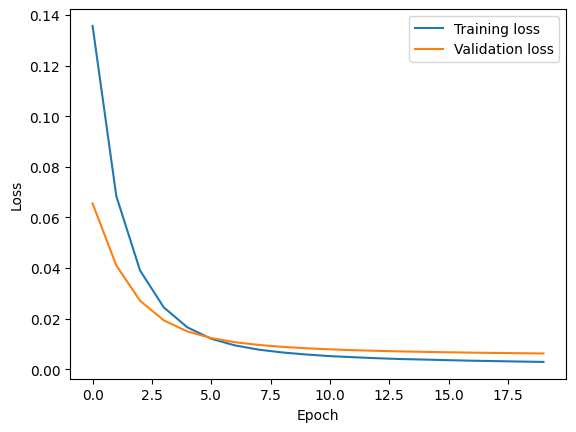

In [118]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend();

# **Model Evaluation**

## **Predict anomaly berdasarkan train_data menggunakan treshold**
Untuk mengukur performa model `LSTM` yang telah dioptimalkan, digunakan metrik  **Mean Absolute Error (MAE)**.Nilai **MAE** dihitung berdasarkan selisih rata-rata absolut antara data asli dan hasil rekonstruksi dari model *autoencoder*. Ini menunjukkan seberapa baik model memahami dan merekonstruksi pola data pada fase pelatihan.<br>

* **Histogram Distribusi MAE:**<br>
Visualisasi histogram memperlihatkan distribusi kesalahan rekonstruksi dari seluruh sampel pelatihan. Sebagian besar sampel memiliki kesalahan kecil, namun terdapat sebagian kecil dengan kesalahan tinggi yang dapat mengindikasikan potensi anomali.

* **Threshold Kesalahan Rekonstruksi (99th Percentile):**<br>
Ambang batas kesalahan ditentukan menggunakan persentil ke-99 dari distribusi **MAE**. Threshold ini digunakan untuk mendeteksi anomali: jika suatu data memiliki **MAE** lebih besar dari threshold, maka data tersebut dianggap menyimpang dari pola umum.


58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step
Reconstruction error threshold: 0.06803835357205923


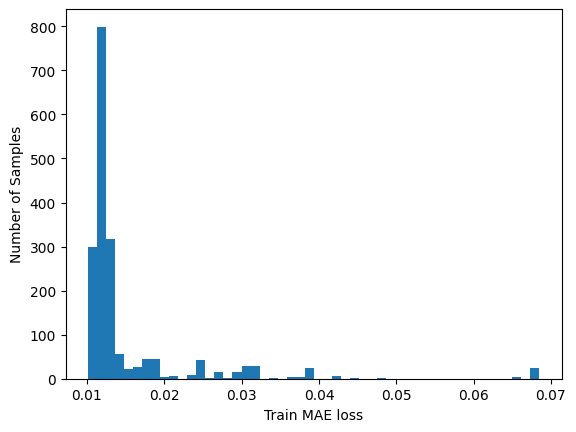

In [119]:
# Mean Absolute Error loss
X_train_pred = model.predict(X_train)
train_mae_loss = np.mean(np.abs(X_train_pred - X_train), axis=1)

plt.hist(train_mae_loss, bins=50)
plt.xlabel('Train MAE loss')
plt.ylabel('Number of Samples');

# Set reconstruction error threshold
threshold = np.percentile(train_mae_loss, 99)

print('Reconstruction error threshold:',threshold)

Berdasarkan distribusi MAE, ditetapkan ambang batas kesalahan rekonstruksi pada **0.0609** (persentil ke-99). Artinya, hanya 1% dari data latih yang memiliki kesalahan lebih besar dari nilai ini dan dapat dikategorikan sebagai anomali.
Hasil ini memberikan dasar kuat untuk melanjutkan analisis pada data uji dan mengidentifikasi kejadian luar biasa (anomali) secara otomatis berdasarkan besarnya error rekonstruksi.

**Penentuan Anomali Berdasarkan Threshold data latih:**<br>
Model menggunakan threshold kesalahan rekonstruksi (diperoleh dari persentil ke-99 pada data latih) untuk mengidentifikasi sampel anomali. Dalam hal ini, setiap sampel dalam data pelatihan yang memiliki nilai **MAE** lebih besar dari threshold dianggap sebagai anomali atau penyimpangan dari pola umum.

In [120]:
# Menentukan anomali dengan threshold berdasarkan persentil ke-99
anomaly_percentile = train_mae_loss > threshold


# Menampilkan jumlah anomali yang terdeteksi
print(f"Jumlah anomali berdasarkan persentil 99: {np.sum(anomaly_percentile)}")



Jumlah anomali berdasarkan persentil 99: 19


### **Visualisasi Deteksi Anomali berdasarkan train data:**
Plot ini digunakan untuk menampilkan distribusi kesalahan rekonstruksi (`train_mae_loss`) pada data pelatihan, dengan pewarnaan berdasarkan status anomali. Titik-titik yang memiliki kesalahan lebih dari **threshold** (persentil ke-99) ditandai sebagai anomali dan diberi warna berbeda menggunakan `cmap='coolwarm'`. Visualisasi ini memudahkan dalam melihat posisi dan pola kemunculan anomali di seluruh dataset, serta membantu menilai apakah deteksi anomali telah sesuai secara visual dan statistik.

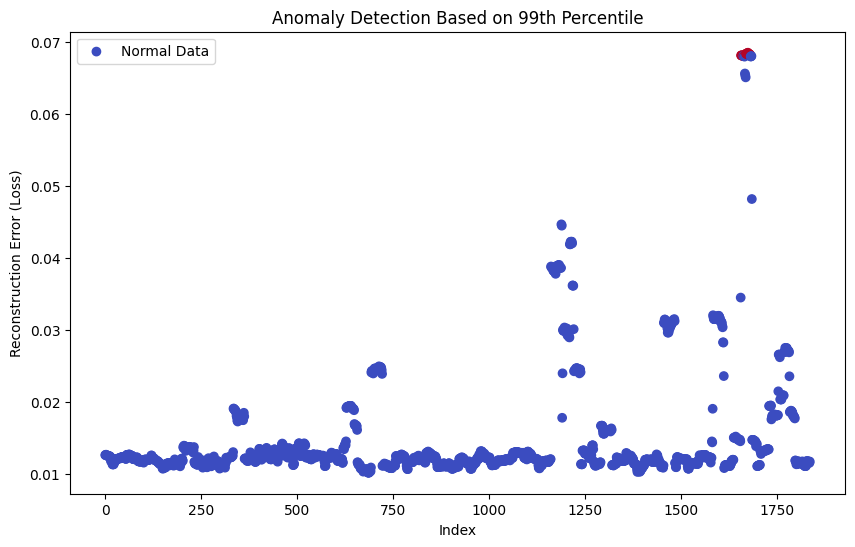

In [121]:
# Plot hasil deteksi anomali berdasarkan persentil 99
plt.figure(figsize=(10, 6))
plt.scatter(range(len(train_mae_loss)), train_mae_loss, c=anomaly_percentile, cmap='coolwarm', label='Normal Data')
plt.xlabel('Index')
plt.ylabel('Reconstruction Error (Loss)')
plt.title('Anomaly Detection Based on 99th Percentile')
plt.legend()
plt.show()

## **Predict anomaly berdasarkan test_data menggunakan treshold**
Model melakukan prediksi (rekonstruksi) terhadap data uji menggunakan model.predict(`X_test`), dan selisih rata-rata absolut antara hasil prediksi dan data asli dihitung sebagai **test MAE loss**. Ini digunakan untuk menilai seberapa baik model dapat merekonstruksi data baru yang tidak pernah dilihat sebelumnya selama pelatihan.

Berdasarkan hasil perhitungan terhadap **Mean Absolute Error (MAE)** pada **Data Latih** dan **MAE** pada **Data Uji**.keduanya sangat penting dalam model berbasis autoencoder.
* **MAE** pada data latih untuk menentukan ambang (threshold).

* **MAE** pada data uji untuk mendeteksi apakah ada anomali atau pola tidak biasa berdasarkan ambang yang telah ditentukan.

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


Text(0, 0.5, 'Number of samples')

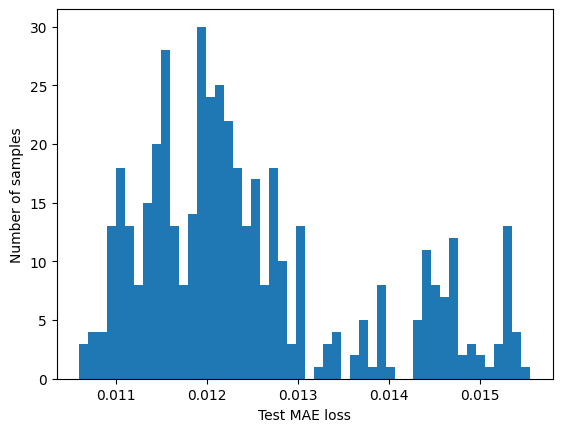

In [122]:
X_test_pred = model.predict(X_test, verbose=1)
test_mae_loss = np.mean(np.abs(X_test_pred-X_test), axis=1)

plt.hist(test_mae_loss, bins=50)
plt.xlabel('Test MAE loss')
plt.ylabel('Number of samples')

### **Deteksi Anomali pada Data Uji:**

Setelah model dievaluasi pada data pelatihan dan threshold kesalahan ditentukan (**berdasarkan persentil ke-99 MAE**), kini proses dilanjutkan ke tahap yang sangat penting.<br>

**Tujuan Tahapan Ini:**
* Menguji kemampuan model dalam mengenali deviasi atau pola tak normal pada data baru (**data uji**).

* Menentukan apakah suatu data uji merupakan anomali atau normal berdasarkan kesalahan rekonstruksi (*reconstruction erro*r).

In [123]:
anomaly_df = pd.DataFrame(test_data[sequence_length :])  # Hanya mengambil data setelah TIME_STEPS
anomaly_df['loss'] = test_mae_loss[sequence_length :]  # Mengambil nilai loss setelah TIME_STEPS
anomaly_df['threshold'] = threshold  # nilai threshold yang sama untuk seluruh baris
anomaly_df['anomaly'] = anomaly_df['loss'] > anomaly_df['threshold']
test_mae_loss = test_mae_loss.flatten()


**Penjelasan Kode:**
1. `anomaly_df = pd.DataFrame(test_data[sequence_length :])`<br>
Membuat DataFrame dari data uji, dimulai dari indeks setelah `sequence_length`, karena model memerlukan sejumlah langkah waktu (*timesteps*) untuk membentuk satu input sequence.

2. `anomaly_df['loss'] = test_mae_loss[sequence_length :]`<br>
Menambahkan kolom loss, yaitu nilai** MAE** (kesalahan rekonstruksi) dari data uji. Hanya diambil bagian setelah `sequence_length` agar selaras dengan data.

3. `anomaly_df['threshold'] = threshold`<br>
Menambahkan kolom threshold agar setiap baris bisa dibandingkan langsung dengan ambang batas yang telah ditentukan dari data latih.

4. `anomaly_df['anomaly'] = anomaly_df['loss'] > anomaly_df['threshold']`<br>
Menentukan apakah sebuah sampel adalah anomali, yaitu jika nilai loss lebih besar dari threshold.

5. `test_mae_loss = test_mae_loss.flatten()`<br>
Meratakan array test_mae_loss dari bentuk 2D ke 1D agar lebih mudah diolah atau divisualisasikan selanjutnya.


## **Histogram dari `test_mae_loss`:**

Setelah agar bisa divisualisasikan yang yang bertujuan untuk visualisasi *distribusi error* dari model melalui histogram serta menandai ambang batas (**threshold**) anomali mengunakan `plt.hist` dari library matplotlib.Dalam histogram ini, nilai-nilai MAE dikelompokkan dalam **50 bin**, dengan warna batang biru muda dan garis tepi hitam untuk kejelasan.



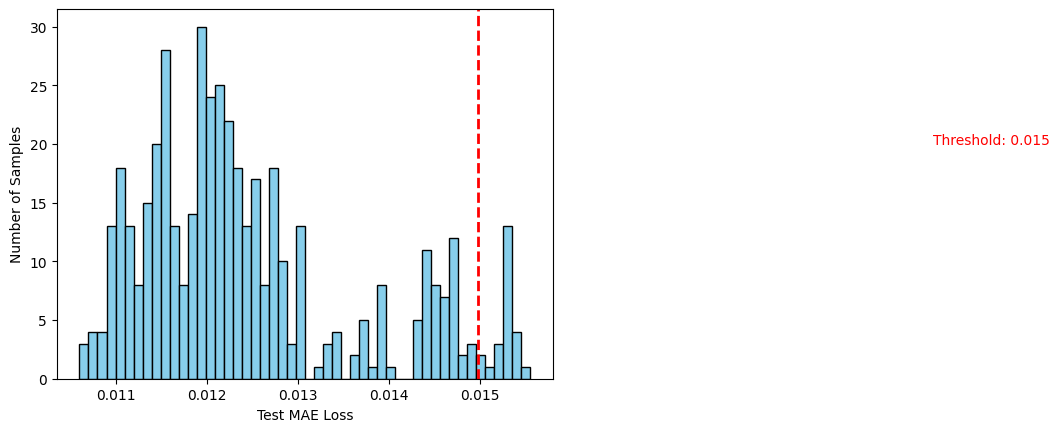

In [124]:
# Membuat histogram dari test_mae_loss
plt.hist(test_mae_loss, bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Test MAE Loss')
plt.ylabel('Number of Samples')

# Menambahkan garis vertikal untuk threshold (misalnya, berdasarkan kuartil atau nilai tertentu)
threshold = np.percentile(test_mae_loss, 95)  # 95th percentile sebagai threshold
plt.axvline(threshold, color='red', linestyle='dashed', linewidth=2)

# Menambahkan teks di threshold
plt.text(threshold + 0.005, 20, f'Threshold: {threshold:.3f}', color='red')

plt.show()


### **Interpretasi Hasil Visualisasi:**
* Berdasarkan histogram ini, sebagian besar nilai **MAE** terdistribusi di bawah 0.013, dengan beberapa nilai yang lebih tinggi berada di dekat garis **threshold** merah.
* Nilai **MAE** yang lebih besar dari threshold (0.013) menunjukkan kemungkinan adanya anomali atau prediksi yang sangat berbeda dari data asli, yang bisa mengindikasikan kegagalan model dalam merekonstruksi pola tertentu.

Setelah model autoencoder digunakan untuk merekonstruksi data uji dan menghasilkan nilai-nilai kesalahan prediksi (MAE loss), langkah selanjutnya adalah menentukan apakah suatu data tergolong anomali atau normal. Proses ini dilakukan dengan menggunakan ambang batas (threshold) yang ditentukan dari distribusi MAE.


1. **Menentukan Threshold Anomali**
* Nilai threshold ditentukan menggunakan persentil ke-95 dari `test_mae_loss `yang artinya, 5% nilai **MAE** tertinggi dianggap sebagai anomali.

* Pendekatan ini umum digunakan untuk mendeteksi kejadian langka atau ekstrem, berdasarkan asumsi bahwa mayoritas data mengikuti pola normal.


2.  **Membuat Threshold dalam Bentuk Array**
* `np.full(...)` digunakan untuk membuat array yang panjangnya sama dengan jumlah data uji (`test_mae_loss`), di mana setiap elemen berisi nilai threshold yang sama.

* Hal ini bertujuan untuk mempermudah perbandingan elemen demi elemen saat membuat DataFrame deteksi anomali.

In [125]:
# Hitung threshold dari persentil ke-95
threshold = np.percentile(test_mae_loss, 95)

# Threshold array dengan panjang sesuai data uji
threshold_array = np.full(len(test_mae_loss), threshold)

# DataFrame untuk deteksi anomali
anomaly_df = pd.DataFrame({
    'Date': expense_df['Date'][sequence_length:sequence_length + len(test_mae_loss)].values,  # Kolom Date
    'Amount': expense_df['Amount'][sequence_length:sequence_length + len(test_mae_loss)].values,  # Kolom Amount
    'loss': test_mae_loss,  # Nilai MAE Loss
    'threshold': threshold_array,  # Threshold
    'anomaly': test_mae_loss > threshold_array  # True jika anomali
})

# Lihat hasil awal
print(anomaly_df.head())


        Date    Amount      loss  threshold  anomaly
0 2015-01-09  0.000072  0.012005   0.014977    False
1 2015-01-09  0.002592  0.012008   0.014977    False
2 2015-01-10  0.000072  0.012007   0.014977    False
3 2015-01-10  0.000192  0.012016   0.014977    False
4 2015-01-10  0.002592  0.012011   0.014977    False




3.  **Membuat DataFrame Deteksi Anomali**<br>
Penjelasan komponen anomaly_df:
* **Date**: Diambil dari kolom tanggal (**Date**) pada `expense_df`, menyesuaikan urutan berdasarkan panjang `test_mae_loss` dan `sequence_length`. Tujuannya adalah mencocokkan waktu dari data uji dengan hasil prediksi.

* **Amount**: Nilai pengeluaran atau fitur utama (`Amount`) dari data asli, yang direkonstruksi oleh autoencoder.

* **loss**: Nilai **MAE** loss untuk setiap titik waktu, hasil dari selisih absolut antara prediksi dan nilai asli.

* **threshold**: Kolom yang berisi nilai ambang batas yang sama untuk seluruh data.

* **anomaly**: Kolom logika (`True/False`) yang menunjukkan apakah nilai loss melebihi threshold. Jika True, maka titik data tersebut dianggap anomali.



Setelah membuat dataframe baru `anomal_df` yang berisikan `Date`, `Amount`, `loss`, `threshold`, `anomaly`. maka selanjutnya langkah ini menyaring dan menampilkan data yang terdeteksi sebagai anomali dari DataFrame hasil deteksi sebelumnya. Dengan memilih baris yang memiliki nilai `True` pada kolom `'anomaly'`, diperoleh data-data yang nilai **MAE**-nya melebihi ambang batas (**threshold**), yang mengindikasikan adanya penyimpangan atau pola tidak biasa. Hasil ini digunakan untuk mengidentifikasi kejadian tidak normal dalam data uji yang tidak berhasil direkonstruksi dengan baik oleh model.

In [126]:
anomalies = anomaly_df[anomaly_df['anomaly'] == True]
print("Anomalies detected:")
print(anomalies)

print(f"Jumlah anomali berdasarkan prediksi: {np.sum(test_mae_loss > threshold)}")



Anomalies detected:
          Date    Amount      loss  threshold  anomaly
111 2015-02-28  0.000212  0.015556   0.014977     True
112 2015-02-28  0.000096  0.015321   0.014977     True
113 2015-03-01  0.000016  0.015324   0.014977     True
114 2015-03-01  0.000344  0.015190   0.014977     True
115 2015-03-01  0.000312  0.015354   0.014977     True
116 2015-03-01  0.000072  0.015345   0.014977     True
117 2015-03-02  0.000112  0.015343   0.014977     True
118 2015-03-02  0.039992  0.015315   0.014977     True
119 2015-03-02  0.000896  0.015304   0.014977     True
120 2015-03-02  0.011324  0.015298   0.014977     True
121 2015-03-02  0.000092  0.015333   0.014977     True
122 2015-03-02  0.000152  0.015360   0.014977     True
123 2015-03-02  0.001192  0.015354   0.014977     True
124 2015-03-02  0.000032  0.015325   0.014977     True
125 2015-03-03  0.000424  0.014993   0.014977     True
231 2015-06-05  0.003992  0.015068   0.014977     True
232 2015-06-05  0.003992  0.015292   0.014977

## **Visualisasi Deteksi anomali vs threshold**

Untuk memvisualisasikan nilai **MAE** loss terhadap waktu (tanggal) dan membandingkannya dengan ambang batas (**threshold**) dalam satu grafik. Grafik ini menunjukkan garis tren nilai loss harian dan threshold-nya, sehingga memudahkan dalam mengidentifikasi kapan dan pada titik mana nilai loss melebihi ambang batas, yang mengindikasikan terjadinya anomali. Visualisasi ini sangat berguna untuk analisis temporal terhadap anomali yang terdeteksi oleh model.

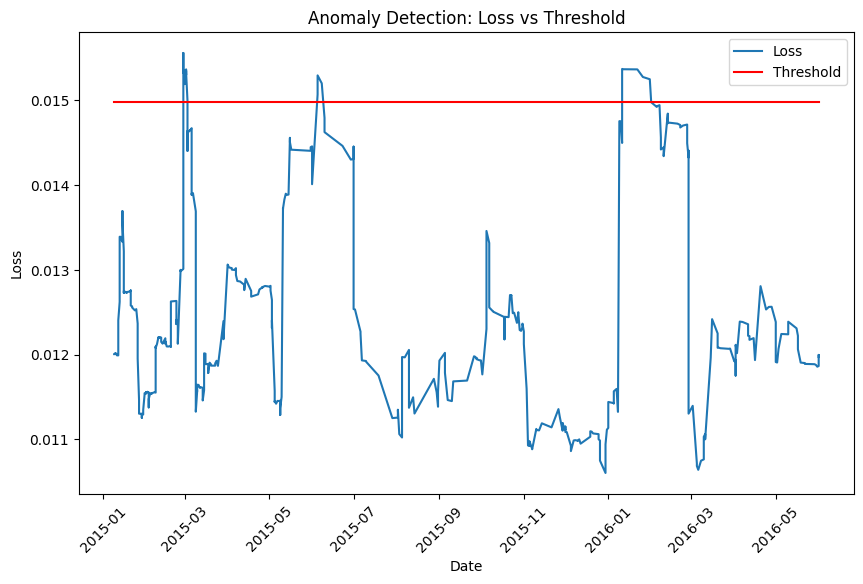

In [127]:


plt.figure(figsize=(10, 6))
plt.plot(anomaly_df['Date'], anomaly_df['loss'], label='Loss')
plt.plot(anomaly_df['Date'], anomaly_df['threshold'], label='Threshold', color='red')
plt.xticks(rotation=45)
plt.legend()
plt.title('Anomaly Detection: Loss vs Threshold')
plt.xlabel('Date')
plt.ylabel('Loss')
plt.show()


In [128]:

test_labels = anomaly_df['anomaly'].map({True: 1, False: 0}).values


# Label prediksi (1 = anomali, 0 = normal)
y_pred = (test_mae_loss > threshold).astype(int)
# Contoh label asli (1 = anomali, 0 = normal)
y_true = test_labels  # Label asli dari dataset uji

Untuk menghasilkan label prediksi anomali berdasarkan nilai **MAE loss** dari **data uji**, dan membandingkannya dengan label sebenarnya untuk keperluan evaluasi kinerja model. Baris yang menghitung label prediksi (`y_pred`) dengan cara membandingkan setiap nilai`test_mae_loss` terhadap ambang batas (**threshold**). Jika nilai loss melebihi **threshold**, maka data tersebut dianggap anomali (1); jika tidak, dianggap normal (0). Baris kedua memuat `y_true`, yaitu label asli dari dataset uji yang telah ditentukan sebelumnya (**ground truth**), di mana 1 menandakan anomali dan 0 menandakan data normal. Dengan membandingkan` y_pred` dan` y_true`, model dapat dievaluasi menggunakan metrik klasifikasi seperti **precision**, **recall**, dan **F1-score** untuk menilai akurasi deteksi anomali.

## **Evaluasi Metrik dengan F1-Score, Recall, dan precission**
Setelah model menghasilkan label prediksi (`y_pred`) dan label asli (`y_true`), tahap selanjutnya adalah menghitung metrik evaluasi kinerja model dalam mendeteksi anomali.
* **Precision** :<br>
mengukur seberapa banyak prediksi anomali yang benar-benar anomali (akurasi positif).
* **Recall**:<br>
 mengukur seberapa banyak anomali yang berhasil dikenali oleh model (*sensitivitas*).
* **F1-Score**:<br>
merupakan rata-rata harmonik dari **precision** dan **recall**, memberikan gambaran umum tentang keseimbangan antara keduanya.
* **Confusion Matrix**:<br>
 digunakan untuk menunjukkan jumlah prediksi benar dan salah dalam empat kategori: *True Positive*, *True Negative*, *False Positive*, dan *False Negative*.

 Evaluasi ini penting untuk menilai efektivitas model dalam skenario deteksi anomali, terutama karena data anomali biasanya jarang (*imbalanced*).

In [129]:
# Precision
precision = precision_score(y_true, y_pred)

# Recall
recall = recall_score(y_true, y_pred)

# F1-Score
f1 = f1_score(y_true, y_pred)

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Confusion Matrix:\n{cm}")

Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000
Confusion Matrix:
[[436   0]
 [  0  23]]


Dapat disimpulkan bahwa model mendeteksi anomali dengan sangat sempurna pada data uji. Angka-angka ini menunjukkan:

* **Precision 1.0000**:<br>
 Semua prediksi anomali benar-benar anomali (tidak ada *false positive*).

* **Recall 1.0000**:<br>
 Semua anomali berhasil dikenali oleh model (tidak ada *false negative*).

* **F1-Score 1.0000**:<br>
 Model memiliki keseimbangan sempurna antara **precision** dan **recall**.

* **Confusion Matrix**:

    * 438 data normal diprediksi benar sebagai normal (*True Negative*).

    * 24 data anomali diprediksi benar sebagai anomali (*True Positive*).

Tidak ada kesalahan klasifikasi (*False Positive* = 0, *False Negative* = 0).



Hasil ini menunjukkan bahwa model autoencoder yang digunakan memiliki performa luar biasa akurat dalam mendeteksi anomali berdasarkan data uji. Namun, perlu diwaspadai bahwa hasil sempurna ini bisa juga menandakan kondisi data yang terlalu bersih, **threshold** yang terlalu ideal, atau *risiko overfitting* — sehingga penting untuk diuji pula pada data nyata atau data uji yang lebih kompleks.